# Lecture 6

## Lecture learning goals

By the end of the lecture you will be able to:

1. Choose appropriate color schemes for your data.
2. Use pre-made and custom color schemes.
3. Selectively highlight and annotate data with color and text.
4. Directly label data instead of using legends.

## Required readings

This lecture's readings are both from Fundamentals of Data Visualization.

- [Section 3 on color choices](https://clauswilke.com/dataviz/color-basics.html)
- [Section 19 on common color pitfalls](https://clauswilke.com/dataviz/color-pitfalls.html)

---

## Facilitate interpretation through informed color choices

In general, when presenting continuous data, a perceptually uniform colormap (such as viridis) is often the most suitable choice. This type of colormap ensures that equal steps in data are perceived as equal steps in color space. The human brain perceives changes in lightness to represent changes in the data more accurately than changes in hue. Therefore, colormaps with monotonically increasing lightness throughout the colormap will be easier to interpret for the viewer. More details and examples of such colormaps are available in the [matplotlib documentation], and many of the core design principles are outlined in [this entertaining talk].

[matplotlib documentation]: http://matplotlib.org/users/colormaps.html
[this entertaining talk]: https://www.youtube.com/watch?v=xAoljeRJ3lU

Nearly 10% of the population is colour vision deficient;
red-green colour blindness in particular affects 8% of men and 0.5% of women.
Guidelines for making your visualizations more accessible to those with reduced color vision,
will in many cases also improve the interpretability of your graphs
for people who have standard color vision.
If you are unsure how your plot will look for someone who sees colors differently than you,
[this website lets you upload and image and simulate different color vision deficiencies](https://www.color-blindness.com/coblis-color-blindness-simulator/).
A colormap designed specifically to look the same
for people with and without the most common color vision deficiency is `cividis`.
In addition to careful color choices,
visualization clarity can be improved by using different shapes for each grouping.

The jet rainbow colormap should be avoided for many reasons, including that the sharp transitions between colors introduces visual threshold that do not represent the underlying continuous data. Another issue is luminance (brightness). For example, your eye is drawn to the yellow and cyan regions, because the luminance is higher. This can have the unfortunate effect of highlighting features in your data that don't exist,
misleading your viewers! Since higher values are not always lighter, this means that your graph is not going to translate well to greyscale. More details about jet can be found in [this blog post] and [this series of posts]. A better alternative when you really need small differences in your data to stand out is to use the [turbo rainbow color scheme](https://ai.googleblog.com/2019/08/turbo-improved-rainbow-colormap-for.html).

[this blog post]: https://jakevdp.github.io/blog/2014/10/16/how-bad-is-your-colormap/
[this series of posts]: https://mycarta.wordpress.com/2012/05/12/the-rainbow-is-dead-long-live-the-rainbow-part-1/

[If you are interested in reading more about how color choices determines what we see,
this is an interesting article](https://eos.org/features/visualizing-science-how-color-determines-what-we-see).

## Color schemes/maps

### Categorical

In [1]:
# Run this cell to ensure that altair plots show up in the exported HTML
# and that the R cell magic works
import altair as alt

# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')

# Load the R cell magic
%load_ext rpy2.ipython

[The default categorical colormap used in Altair is "Tableau10"](https://github.com/EmilHvitfeldt/r-color-palettes),
which consists of 10 colors and starts with a blue, orange, and red color.

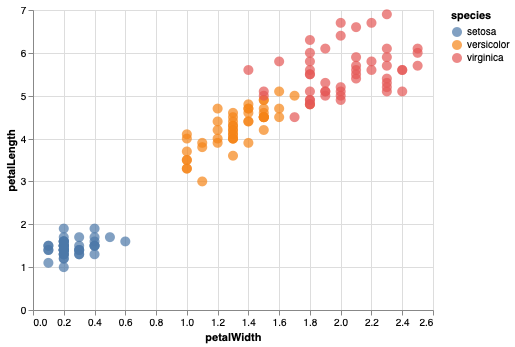

In [2]:
import altair as alt
from vega_datasets import data

iris = data.iris()

alt.Chart(iris).mark_circle(size=100).encode(
    x='petalWidth',
    y='petalLength',
    color=alt.Color('species'))

You can change the colormap (or colorscheme) by specifying its name as a string
to `scheme` inside `alt.Scale`.
[All the available colormaps can be viewed on this page](https://vega.github.io/vega/docs/schemes/),
which also lists what type of data the colormap is useful for
(categorical, sequential, diverging, cyclic).

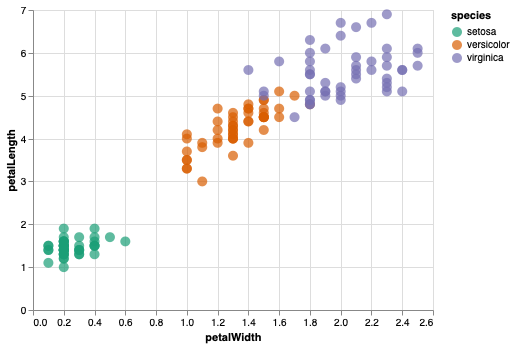

In [3]:
alt.Chart(iris).mark_circle(size=100).encode(
    x='petalWidth',
    y='petalLength',
    color=alt.Color('species', scale=alt.Scale(scheme='dark2')))

If you don't like any of the premade colormaps,
you could make your own.
It can be really fun to experiment with different colors
and I encourage you do to so.
However,
please keep in mind that the existing colorscales
have had a lot of knowledge and consideration going into them,
so there are good reasons to use them for your final versions of plots
especially for communication purposes,
at least until you have gotten more knowledgeable about these topics yourself.

Below I use three colors by name,
you can see [all the available names in the first image here](https://stackoverflow.com/a/37232760/2166823)
(one of the color, ["rebecca purple" has a touching story to it](https://medium.com/@valgaze/the-hidden-purple-memorial-in-your-web-browser-7d84813bb416)).
You can also specify colors directly from hex codes,
these are defines over `#000000` for black ("zero color")
to `#ffffff` for white ("full color")
(example with ggplot below).
This is very useful when trying to replicate a plot that someone else has done,
you can use a color picker tool in gimp, paint, or similar,
to get the exact HTML code from an image,
and then use it in your plot as a string.
If you don't have any software with that functionality installed,
you can use [this online color picker tools](https://stackoverflow.com/a/37232760/2166823).

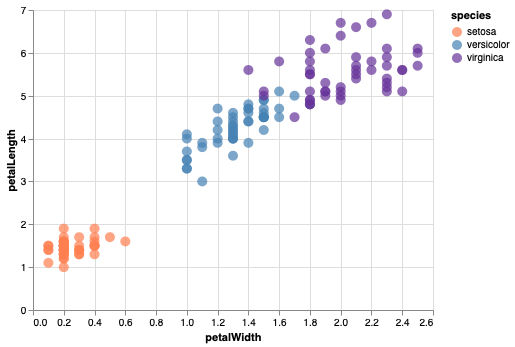

In [4]:
colors = ['coral', 'steelblue', 'rebeccapurple']
alt.Chart(iris).mark_circle(size=100).encode(
    x='petalWidth',
    y='petalLength',
    color=alt.Color('species', scale=alt.Scale(range=colors)))

### Sequential

When encoding a numerical variable as color,
a perceptually uniform sequential colormap will be chosen
to accurately represent the changes numerical changes as color changes.
It is usually a good idea to have the low values
be the ones closest to the background color,
as the light blue ones below.

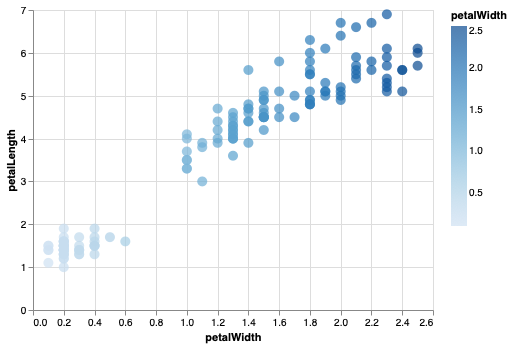

In [5]:
alt.Chart(iris).mark_circle(size=100).encode(
    x='petalWidth',
    y='petalLength',
    color=alt.Color('petalWidth'))

You can [change the colorscheme to any of the ones listed here.](https://vega.github.io/vega/docs/schemes/#scheme-reference)

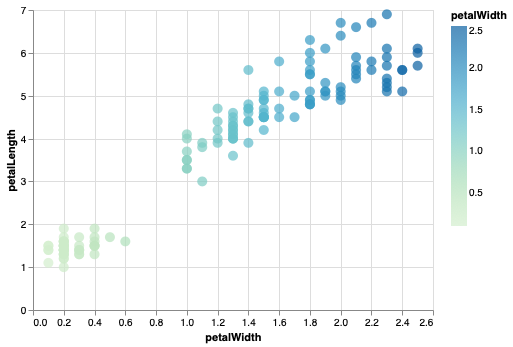

In [6]:
alt.Chart(iris).mark_circle(size=100).encode(
    x='petalWidth',
    y='petalLength',
    color=alt.Color('petalWidth', scale=alt.Scale(scheme='greenblue')))

"Viridis" is a well-research colorscheme,
originally developed for matplotlib and now used in many different places.
Compared to the ones above,
you see changes in detail slightly better
because of the increased amount of hues/colors used,
which could also give rise to a very slight extra highlighting effect
(for example when going from green to yellow), 
as we discussed in the intro video.

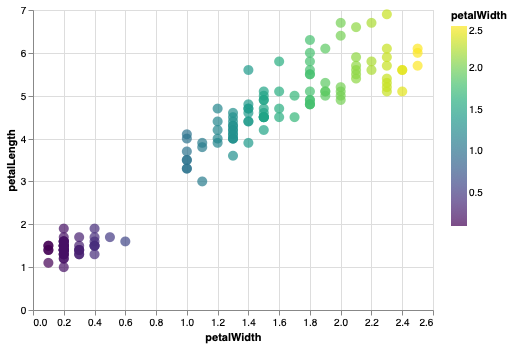

In [7]:
alt.Chart(iris).mark_circle(size=100).encode(
    x='petalWidth',
    y='petalLength',
    color=alt.Color('petalWidth', scale=alt.Scale(scheme='viridis')))

You can reverse a color scale,
the same way we learn how to reverse axes scales.

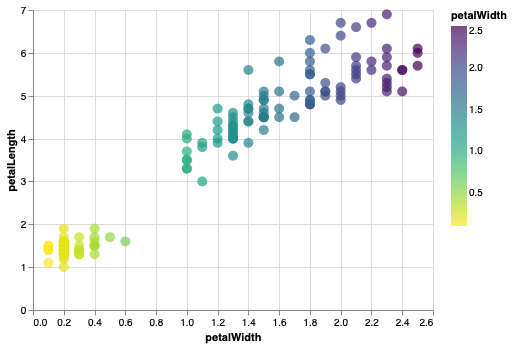

In [8]:
alt.Chart(iris).mark_circle(size=100).encode(
    x='petalWidth',
    y='petalLength',
    color=alt.Color('petalWidth', scale=alt.Scale(scheme='viridis', reverse=True)))

### Diverging

If we were to map a variable that has a natural midpoint,
such as a correlation that is defined from -1 to 1,
it is not that helpful to use the default colormap,
since it will make values close to zero
seem more important than value close to -1.

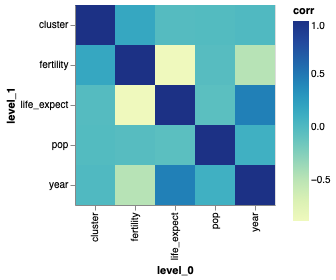

In [9]:
corr_df = data.gapminder().corr().stack().reset_index(name='corr')
alt.Chart(corr_df).mark_rect().encode(
    x='level_0',
    y='level_1',
    tooltip='corr', 
    color=alt.Color('corr')).properties(width=200, height=200)

Instead we can choose a color scheme
that is more suitable for showing diverging values,
and define the color domain manually 
to match the range of our variable.
An alternative to setting the color scheme explicitly
would have been to set `domainMid=0`,
in which case Altair understand this is a diverging variable
with a natural midpoint and uses the default diverging color scheme.

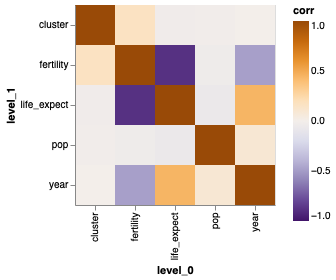

In [10]:
(alt.Chart(corr_df).mark_rect().encode(
    x='level_0',
    y='level_1',
    tooltip='corr',
    color=alt.Color('corr', scale=alt.Scale(domain=(-1, 1), scheme='purpleorange')))
 .properties(width=200, height=200)) 

### ggplot

#### Categorical

The default categorical colormap in ggplot is not explicitly designed,
but rather [created by selecting equally spaced colors from the color wheel](https://stackoverflow.com/questions/8197559/emulate-ggplot2-default-color-palette).

In [11]:
%%R

options(tidyverse.quiet = TRUE) 
library(tidyverse)

theme_set(theme_light(base_size = 18))

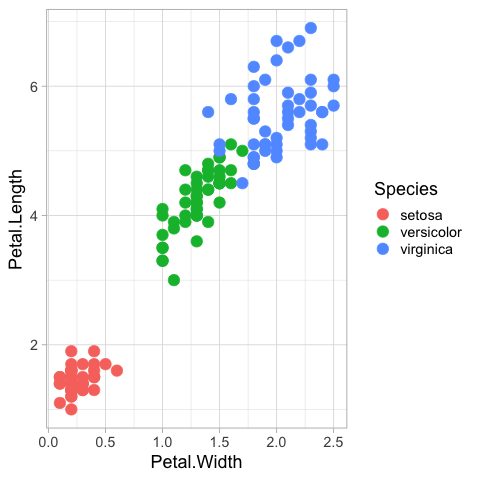

In [12]:
%%R

ggplot(iris) + 
    aes(x = Petal.Width,
        y = Petal.Length,
        color = Species) +
    geom_point(size = 5)

All useful color maps are not collecting in one place,
but available through different functions and packages.
For example,
the [color maps from color brewer](https://github.com/EmilHvitfeldt/r-color-palettes/blob/master/man/figures/README-RColorBrewer-1.png) are accessible via
`scale_color|fill_brewer|distiller`
(use the brewer suffix for categorical and distiller for sequential values).

%%R
ggplot(iris) + 
    aes(x = Petal.Width,
        y = Petal.Length,
        color = Species) +
    geom_point(size = 5) +
    scale_color_brewer(palette = 'Dark2')

[All R colors maps can be viewed in this repo](https://github.com/EmilHvitfeldt/r-color-palettes).
[The tableau colors used in Altair are accessible via the ggthemes package](https://github.com/EmilHvitfeldt/r-color-palettes/blob/master/man/figures/README-ggthemes-1.png).

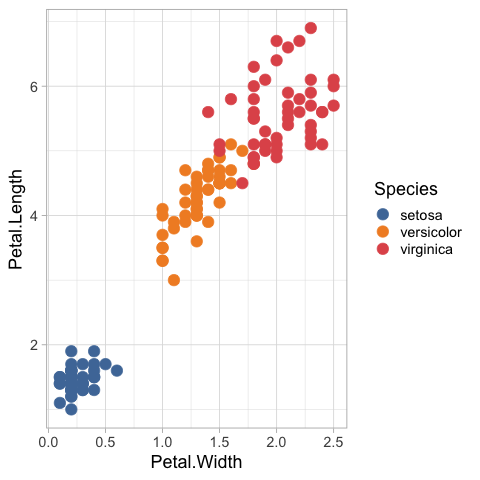

In [13]:
%%R
ggplot(iris) + 
    aes(x = Petal.Width,
        y = Petal.Length,
        color = Species) +
    geom_point(size = 5) +
    ggthemes::scale_color_tableau()

We could also set the colorscale manually,
let's use the same colors as in the altair example, 
but this time via their HTML codes instead.

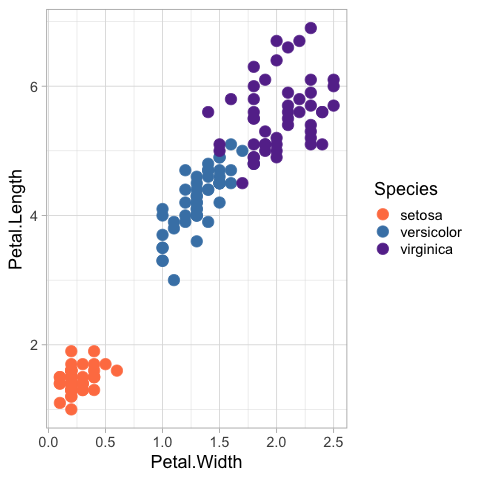

In [14]:
%%R
ggplot(iris) + 
    aes(x = Petal.Width,
        y = Petal.Length,
        color = Species) +
    geom_point(size = 5) +
    scale_color_manual(values = c('#FF7F50', '#4682B4', '#663399'))

#### Sequential

The default color map for numerical values goes from dark to white,
since the default background is dark.

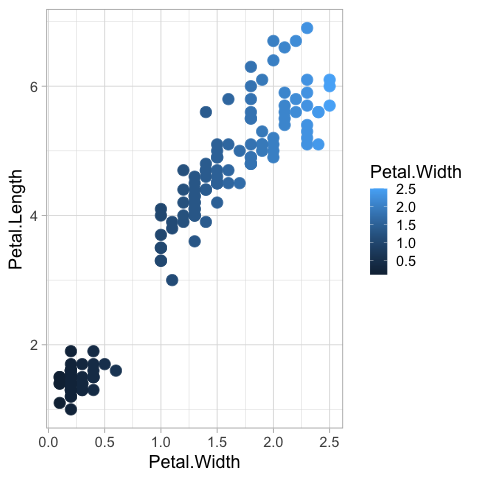

In [15]:
%%R
ggplot(iris) + 
    aes(x = Petal.Width,
        y = Petal.Length,
        color = Petal.Width) +
    geom_point(size = 5)

It can be changed to the viridis color map.

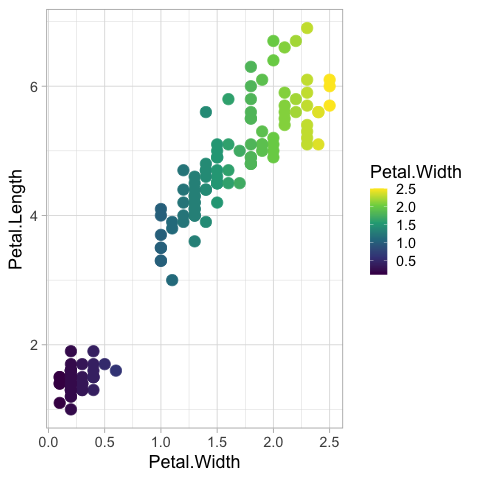

In [16]:
%%R
ggplot(iris) + 
    aes(x = Petal.Width,
        y = Petal.Length,
        color = Petal.Width) +
    geom_point(size = 5) +
    scale_color_viridis_c()

Reversing is possible via the same techniques as for axes,
but it does not look great since the color legend is sorted "upside down".

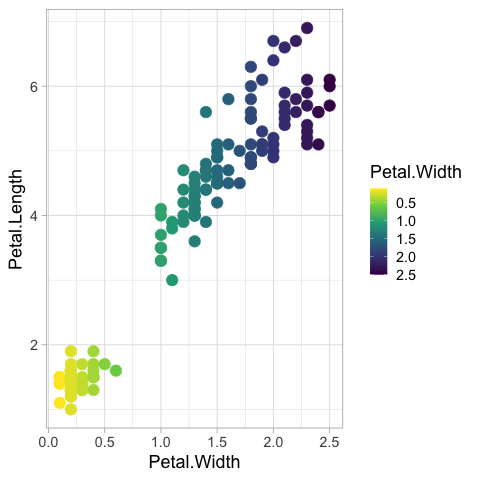

In [17]:
%%R
ggplot(iris) + 
    aes(x = Petal.Width,
        y = Petal.Length,
        color = Petal.Width) +
    geom_point(size = 5) +
    scale_color_viridis_c(trans = 'reverse')

There is a special syntax for colormaps
that preserves the orientation of the legend
while reversing.

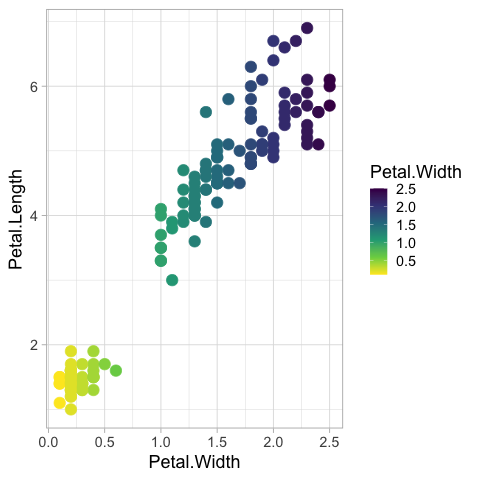

In [18]:
%%R
ggplot(iris) + 
    aes(x = Petal.Width,
        y = Petal.Length,
        color = Petal.Width) +
    geom_point(size = 5) +
    scale_color_viridis_c(direction = -1)

#### Diverging

Like in Altair,
it is not that informative to use the default color map for diverging values.

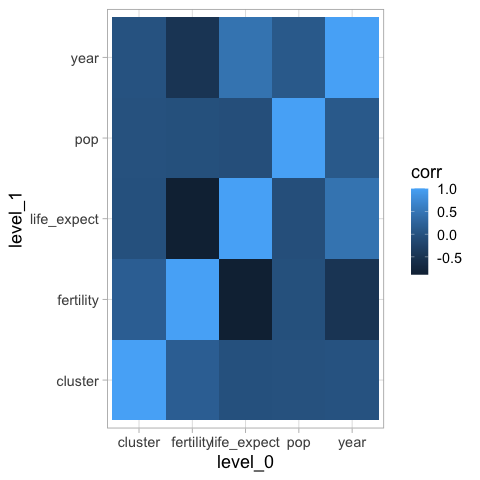

In [19]:
%%R -i corr_df
library(tidyverse)

ggplot(corr_df) +
    aes(x = level_0,
        y = level_1,
        fill = corr) +
    geom_tile()

[The default bluered tableau diverging color map can be used via ggthemes](https://jrnold.github.io/ggthemes/reference/index.html).

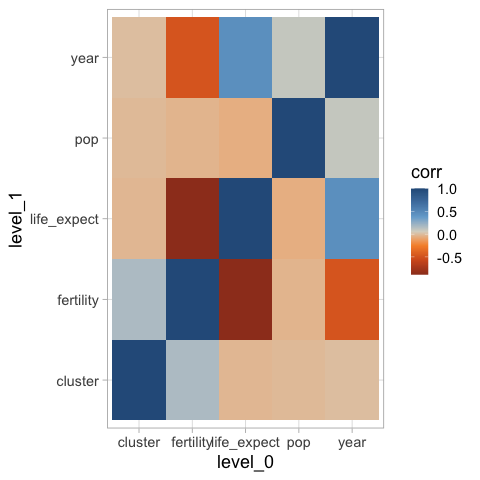

In [20]:
%%R -i corr_df
ggplot(corr_df) +
    aes(x = level_0,
        y = level_1,
        fill = corr) +
    geom_tile() +
    ggthemes::scale_fill_gradient2_tableau()

However,
this sets blue as high values by default,
which is against people's intuition
since red is often used for "hot" and blue or "cold".
We can either reverse the colormap,
or use one from ColorBrewer instead.

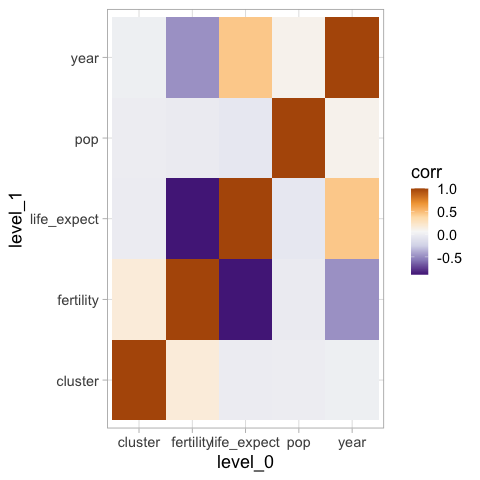

In [21]:
%%R -i corr_df
ggplot(corr_df) +
    aes(x = level_0,
        y = level_1,
        fill = corr) +
    geom_tile() +
    scale_fill_distiller(palette = 'PuOr')

Defining the colormap limits ensures that low and high values of the same magnitude
are equally highlighted.

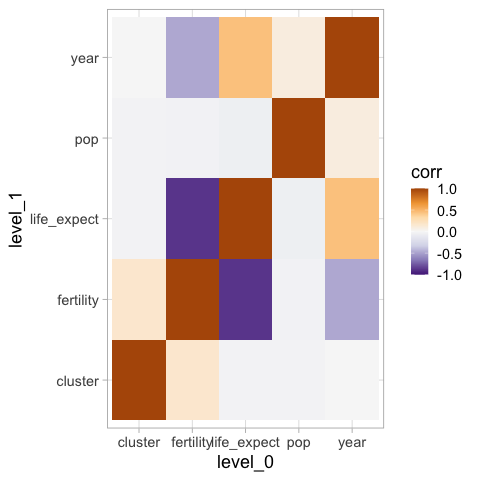

In [22]:
%%R -i corr_df
ggplot(corr_df) +
    aes(x = level_0,
        y = level_1,
        fill = corr) +
    geom_tile() +
    scale_fill_distiller(palette = 'PuOr', limits = c(-1, 1))

## Highlighting with colors and text labels

We can also use color to highlight manually select elements in plots,
for example the year with the highest wheat price in the figure below.

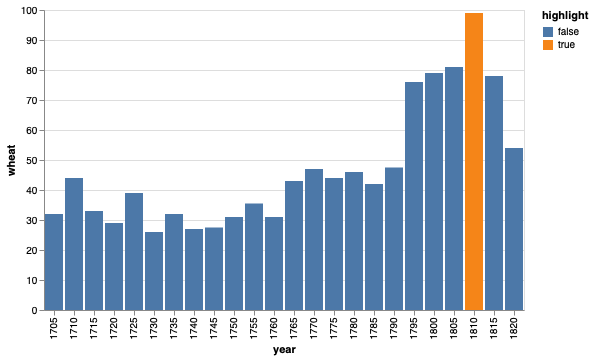

In [23]:
wheat = data.wheat().query('year > 1700')  # Reduce the number of bars for clarity

# Set the year to be highlighted to a separate value in a new column
wheat['highlight'] = False
wheat.loc[wheat['year'] == wheat['year'].iloc[wheat['wages'].argmax()], 'highlight'] = True

alt.Chart(wheat).mark_bar().encode(
    x='year:O',
    y="wheat",
    color='highlight')

The legend is not that useful here so lets remove it.

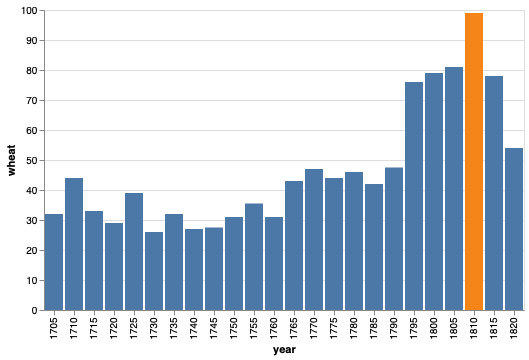

In [24]:
alt.Chart(wheat).mark_bar().encode(
    x='year:O',
    y="wheat",
    color=alt.Color('highlight', legend=None))

Adding an annotation in the form of the exact price can be helpful.

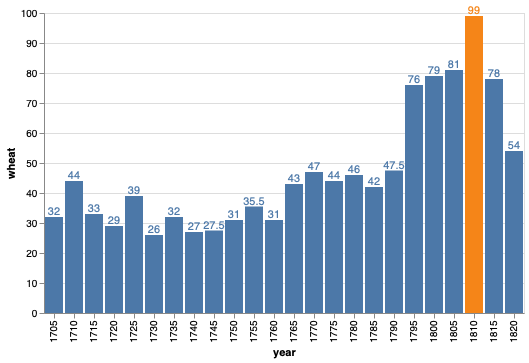

In [25]:
bars = alt.Chart(wheat).mark_bar().encode(
    x='year:O',
    y="wheat",
    color=alt.Color('highlight', legend=None))
bars + bars.mark_text(dy=-5).encode(text='wheat')

If we want to override the color,
we need to set it in the encoding.
Setting it in the `mark` would not work
since we are building off a chart which has the encoding color set,
and this has higher precedence than color set in the `mark`.
To pass a literal value in the encoding
(instead of asking altair to look for a column with this name in the dataframe),
we can use `alt.value()`.

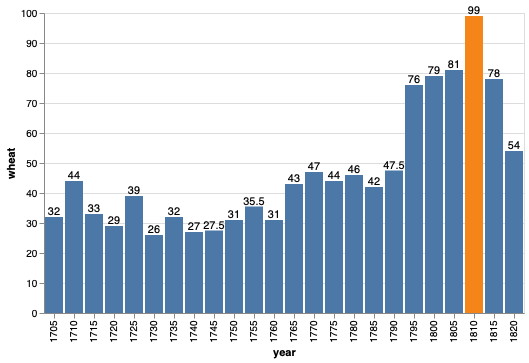

In [26]:
bars = alt.Chart(wheat).mark_bar().encode(
    x='year:O',
    y="wheat",
    color=alt.Color('highlight', legend=None))
bars + bars.mark_text(dy=-5).encode(text='wheat', color=alt.value('black'))

Now that we are supplying the exact value,
we no longer need the gridlines,
which are there to help infer values
(and also make exact comparisons between graphical elements far away from each other).

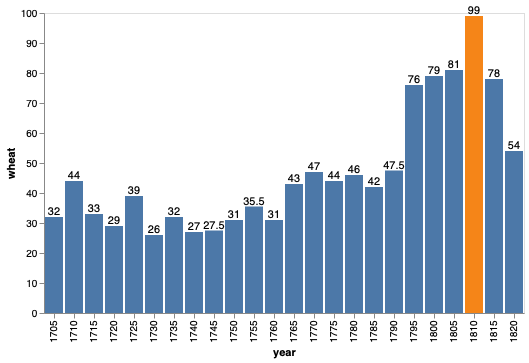

In [27]:
bars = alt.Chart(wheat).mark_bar().encode(
    x='year:O',
    y=alt.Y('wheat', axis=alt.Axis(grid=False)),
    color=alt.Color('highlight', legend=None))
bars + bars.mark_text(dy=-5).encode(text='wheat', color=alt.value('black'))

Generally,
having an outline of a plot is not that aesthetically pleasing.
It works well in altair when we have the gridlines since they melt together,
but now that they are gone,
let's also remove the outline.

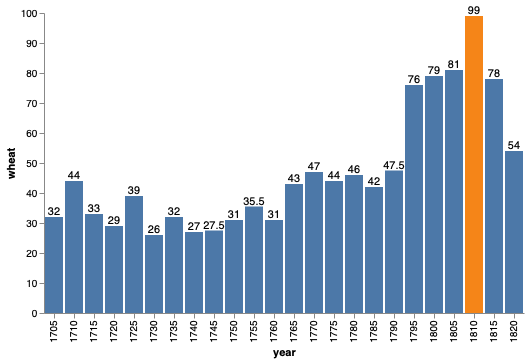

In [28]:
bars = alt.Chart(wheat).mark_bar().encode(
    x='year:O',
    y=alt.Y('wheat', axis=alt.Axis(grid=False)),
    color=alt.Color('highlight', legend=None))
(bars + bars.mark_text(dy=-5).encode(text='wheat', color=alt.value('black'))).configure_view(strokeWidth=0)

We can highlight only the year
by filtering the data frame.

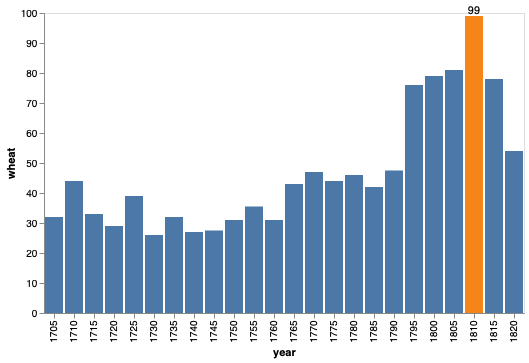

In [29]:
bars + alt.Chart(wheat.query('year == 1810')).mark_text(dy=-5).encode(
    x='year:O',
    y=alt.Y("wheat",axis=alt.Axis(grid=False)),
    text='wheat')

To set a custom text,
we can use `alt.value` again.

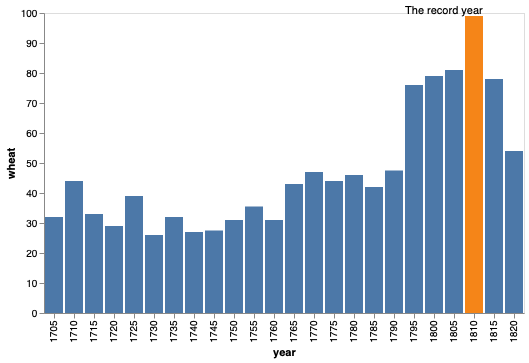

In [30]:
bars + alt.Chart(wheat.query('year == 1810')).mark_text(dy=-5, dx=-30).encode(
    x='year:O',
    y="wheat",
    text=alt.value('The record year'))

To set multiple values,
we could either add an annotation column to our existing data frame,
or create a new dataframe as below.

In [31]:
import pandas as pd

annot_wheat = pd.DataFrame({'year': [1730, 1810], 'wheat': [26, 99], 'text': ['The lowest year', 'The record year']})
annot_wheat

,year,wheat,text
0,1730,26,The lowest year
1,1810,99,The record year


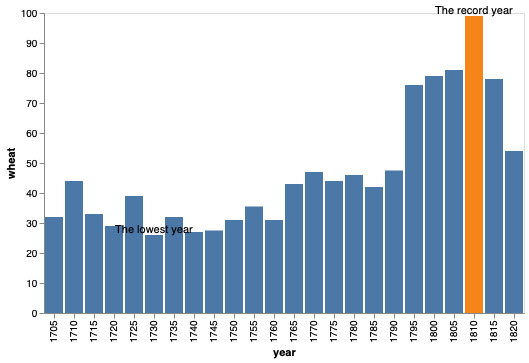

In [32]:
bars + alt.Chart(annot_wheat).mark_text(dy=-5).encode(
    x='year:O',
    y="wheat",
    text='text')

To avoid the overlap of the new annotation and the blue bars,
we would have to create the annotations in two separate steps 
and change their text position or color accordingly.
If using two separate steps,
we can also use the `alt.value()` technique,
which avoids us having to create the new data frame.

### ggplot

Using the dataframe with the highlight column,
we can set the fill accordingly.

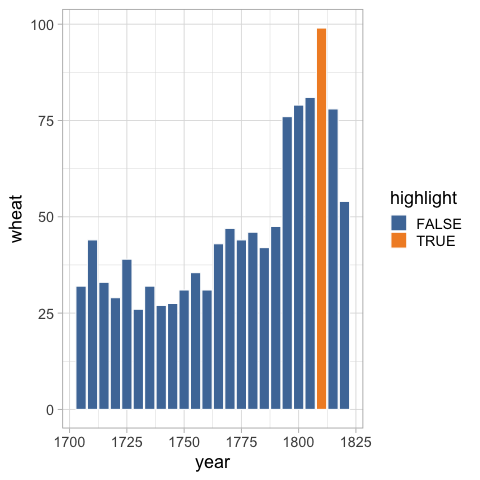

In [33]:
%%R -i wheat
ggplot(wheat) +
    aes(x = year,
        y = wheat,
        fill = highlight) +
    geom_bar(stat = 'identity', color = 'white') +
    ggthemes::scale_fill_tableau()

And remove the legend.

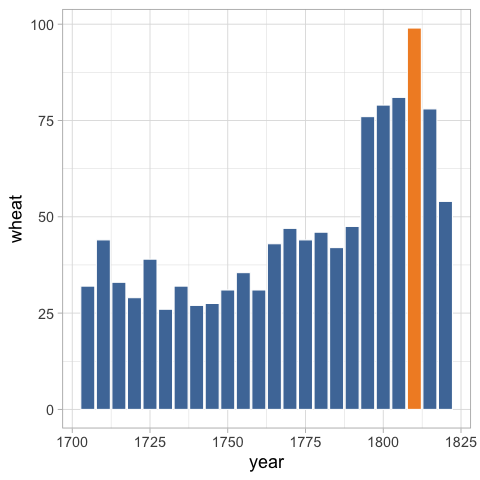

In [34]:
%%R 
ggplot(wheat) +
    aes(x = year,
        y = wheat,
        fill = highlight) +
    geom_bar(stat = 'identity', color = 'white') + 
    ggthemes::scale_fill_tableau() +
    theme(legend.position = 'none')

To add annotations,
we can use `geom_text` 
with the `label` aesthetic.

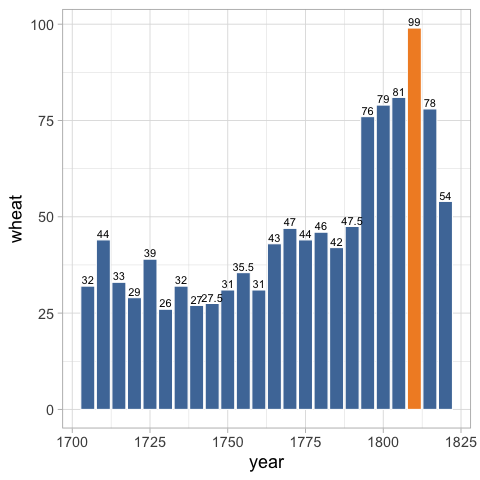

In [35]:
%%R 
ggplot(wheat) +
    aes(x = year,
        y = wheat,
        fill = highlight,
        label = wheat) +
    geom_bar(stat = 'identity', color = 'white') + 
    geom_text(vjust=-0.3) +
    ggthemes::scale_fill_tableau() +
    theme(legend.position = 'none')

To get these to be the same colors as the bars,
we can set the `color` aestethic,
and add the corresponding color scale.

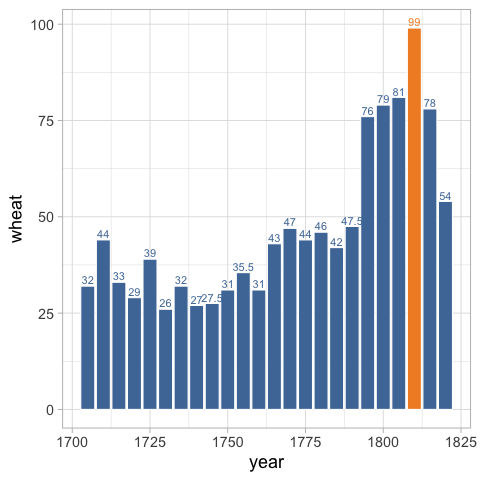

In [36]:
%%R
ggplot(wheat) +
    aes(x = year,
        y = wheat,
        fill = highlight,
        label = wheat,
        color = highlight) +
    geom_bar(stat = 'identity', color = 'white') + 
    geom_text(vjust=-0.3) +
    ggthemes::scale_fill_tableau() +
    ggthemes::scale_color_tableau() +
    theme(legend.position = 'none')

Now we can remove the gridlines.

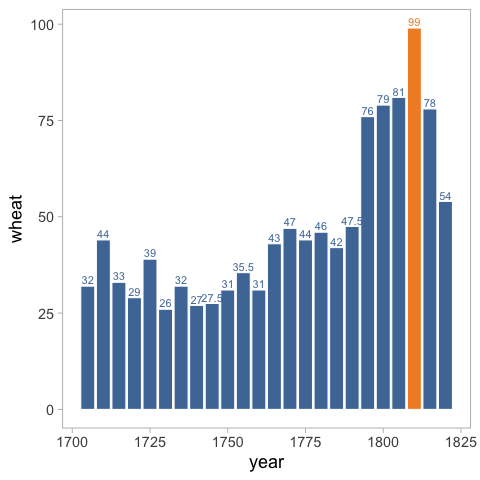

In [37]:
%%R
ggplot(wheat) +
    aes(x = year,
        y = wheat,
        fill = highlight,
        label = wheat,
        color = highlight) +
    geom_bar(stat = 'identity', color = 'white') + 
    geom_text(vjust=-0.3) +
    ggthemes::scale_fill_tableau() +
    ggthemes::scale_color_tableau() +
    theme(legend.position = 'none',
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank())

If you want your label to represent the count
(which we normally calculate in the geom for ggplot),
you can set it to `label = stat(count)`.

To set a specific annotation text,
we could either use the same approach as in Altair 
of adding a new column to our data frame,
or we could use the `annotate` function.

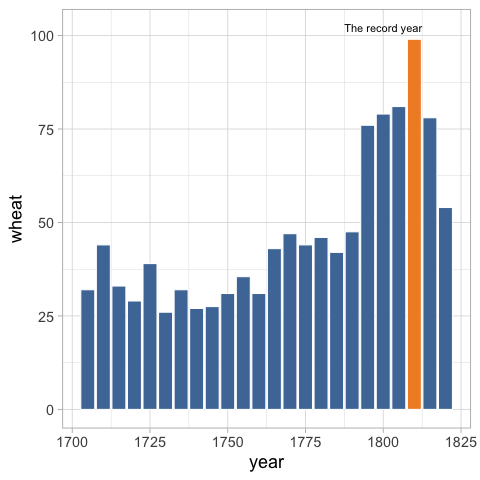

In [38]:
%%R
ggplot(wheat) +
    aes(x = year,
        y = wheat,
        fill = highlight) +
    geom_bar(stat = 'identity', color = 'white') + 
    annotate('text', label = 'The record year', x = 1800, y = 102) +
    ggthemes::scale_fill_tableau() +
    theme(legend.position = 'none')

## Direct labeling instead of using a legend

In the example below,
the legend is not in the same order as where the lines end,
which can make it a bit less intuitive to read.

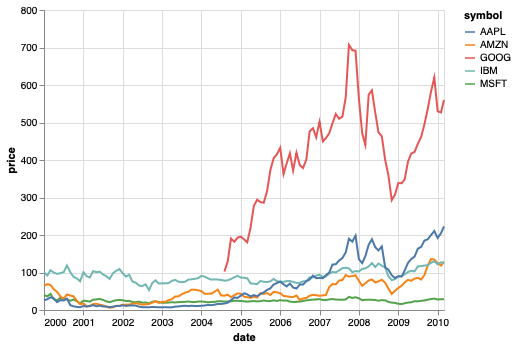

In [39]:
stocks = data.stocks()

alt.Chart(stocks).mark_line().encode(
    x='date',
    y='price',
    color='symbol')

We can align the ordering of these two,
by calculating the order of the lines at the maximum year
and then and then passing the labels in this order as a list to the `sort` parameter.

In [40]:
stock_order = (
    stocks
    .loc[stocks['date'] == stocks['date'].max()]
    .sort_values('price', ascending=False))
stock_order

,symbol,date,price
436,GOOG,2010-03-01,560.19
559,AAPL,2010-03-01,223.02
245,AMZN,2010-03-01,128.82
368,IBM,2010-03-01,125.55
122,MSFT,2010-03-01,28.80


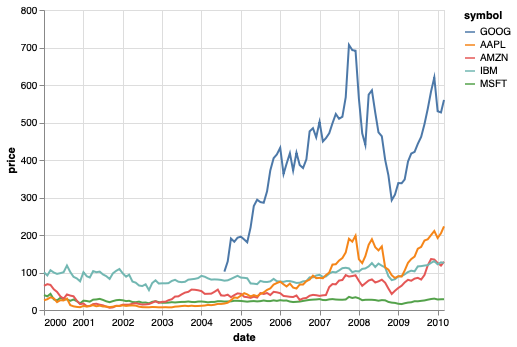

In [41]:
alt.Chart(stocks).mark_line().encode(
    x='date',
    y='price',
    color=alt.Color('symbol', sort=stock_order['symbol'].tolist()))

The title for categorical axes or legends are often not that informative,
and in many cases we can remove it.

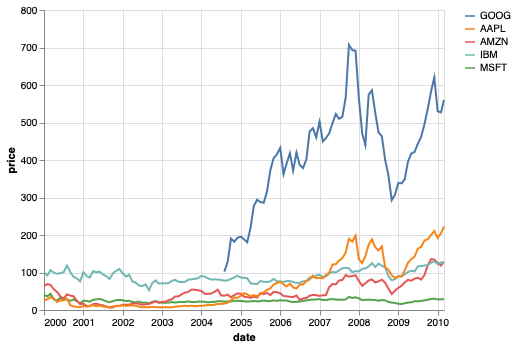

In [42]:
alt.Chart(stocks).mark_line().encode(
    x='date',
    y='price',
    color=alt.Color(
        'symbol',
        sort=stock_order['symbol'].tolist(),
        legend=alt.Legend(title=None)))

We can use the annotation approach from above to label the lines directly,
and get rid of the legend altogether.

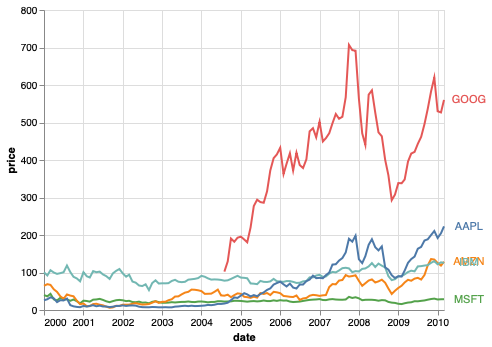

In [43]:
lines = alt.Chart(stocks).mark_line().encode(
    x='date',
    y='price',
    color=alt.Color('symbol', legend=None))

text = alt.Chart(stock_order).mark_text(dx=25).encode(
    x='date',
    y='price',
    text='symbol',
    color='symbol')

lines + text

### ggplot

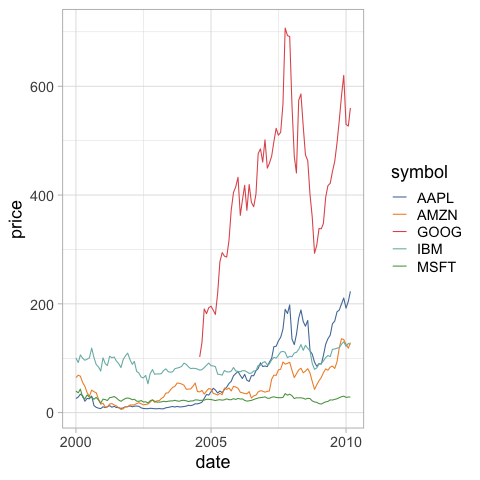

In [44]:
%%R -i stocks
ggplot(stocks) + 
    aes(x = date,
        y = price,
        color = symbol) +
    geom_line() + 
    ggthemes::scale_color_tableau()

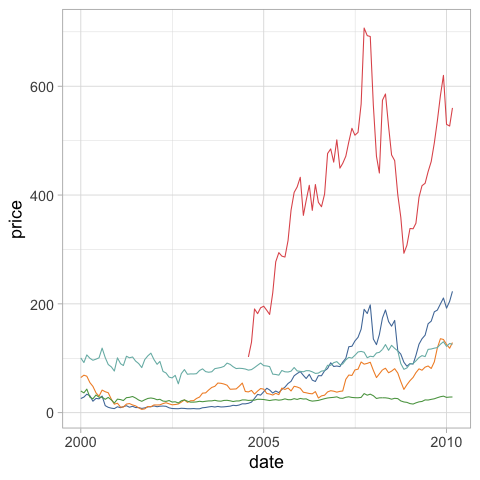

In [45]:
%%R
ggplot(stocks) + 
    aes(x = date,
        y = price,
        color = symbol) +
    geom_line() +
    ggthemes::scale_color_tableau() +
    theme(legend.position = 'none')

Here we use the same approach with `geom_text` and `label` as we did above.
The difference is that we're explicitly setting the data inside `geom_text`
to use the dataframe that has been filtered to contain the max year only.

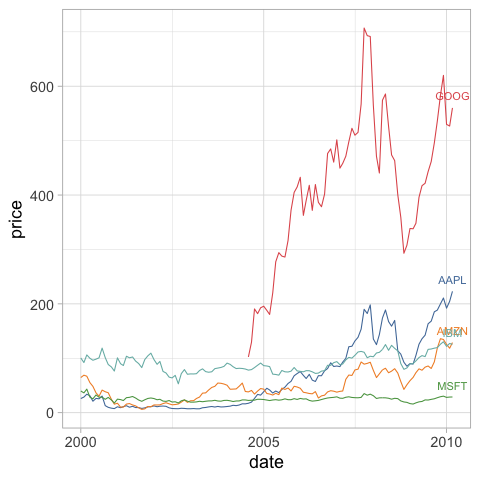

In [46]:
%%R -i stock_order
ggplot(stocks) + 
    aes(x = date,
        y = price,
        color = symbol,
        label = symbol) +
    geom_line() +
    geom_text(data = stock_order, vjust=-1) +
    ggthemes::scale_color_tableau() +
    theme(legend.position = 'none')

You can try the [`ggrepel`](https://ggrepel.slowkow.com/articles/examples.html) package to help you with annotations. It's pretty cool!

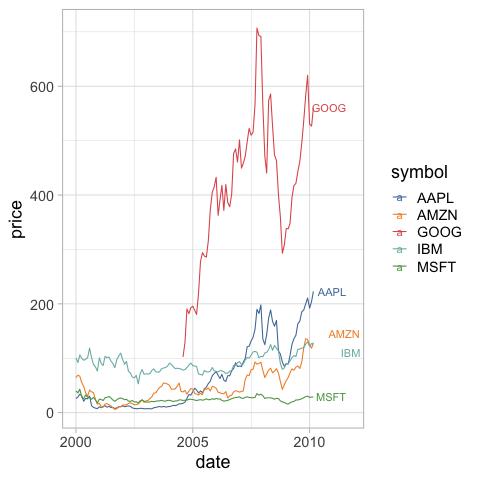

In [47]:
%%R -i stock_order
library(ggrepel())

extrema <- 
  stocks %>%
    group_by(symbol) %>%
    slice(which.max(date))

# Adding a couple of years to the date
extrema['date'] = extrema['date'] + 5E7

ggplot(stocks) + 
    aes(x = date,
        y = price,
        color = symbol,
        label = symbol) +
    geom_line() +
    ggthemes::scale_color_tableau() +
    geom_text_repel(
        data = extrema,
        aes(date, label = symbol),
        min.segment.length = Inf,
      )